## Importing neccessary modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.api import ExponentialSmoothing

import warnings
warnings.filterwarnings('ignore')

In [2]:
sales=pd.read_csv(R"K:\Desktop\NIIT\tables\DS3_C1_S2_Store_Item_Sales_Data_Challenge.csv",parse_dates=["date"])

In [3]:
sales.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [4]:
sales.dtypes

date     datetime64[ns]
store             int64
item              int64
sales             int64
dtype: object

## Task 1 

In [5]:
sales.set_index(["date"],inplace=True)

In [6]:
sales.head()

,store,item,sales
date,,,
2013-01-01,1,1,13
2013-01-02,1,1,11
2013-01-03,1,1,14
2013-01-04,1,1,13
2013-01-05,1,1,10


<AxesSubplot: xlabel='date'>

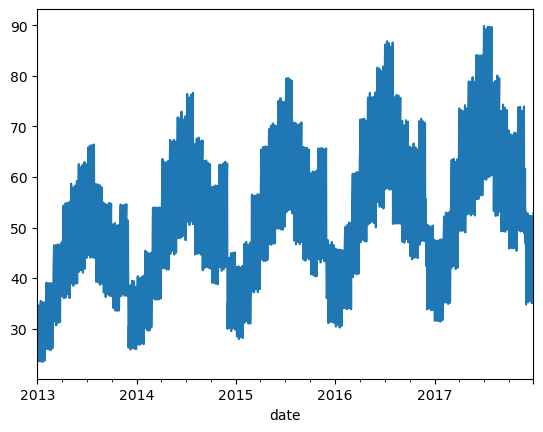

In [7]:
sales.sales.resample("D").mean().plot()

## Task 2 

In [8]:
components=seasonal_decompose(sales.sales,period=12)

In [9]:
trends=components.trend
resid=components.resid
season=components.seasonal

Text(0.5, 1.0, 'Resid')

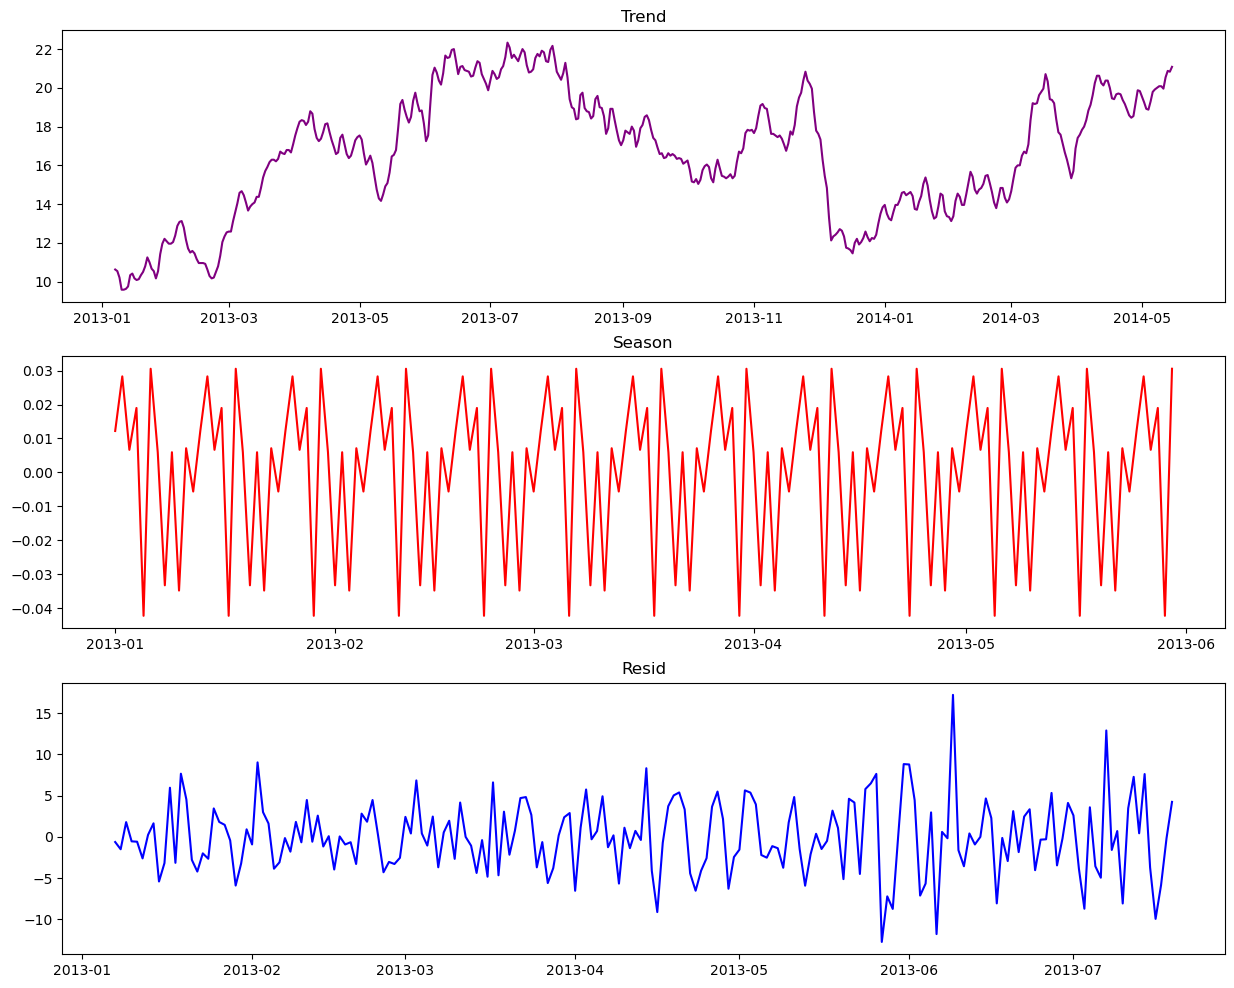

In [10]:
fig, axes = plt.subplots(3,1, figsize=(15,12))

axes[0].plot(trends[0:500],c='purple')
axes[0].set_title('Trend')
axes[1].plot(season[0:150],c='Red')
axes[1].set_title('Season')
axes[2].plot(resid[0:200],c='blue')
axes[2].set_title('Resid')


## To resample and analyze all components of TS

In [11]:
monthly=sales.resample("M").mean()

In [12]:
components=seasonal_decompose(monthly.sales,period=12)

In [13]:
trends=components.trend
resid=components.resid
season=components.seasonal

Text(0.5, 1.0, 'Resid')

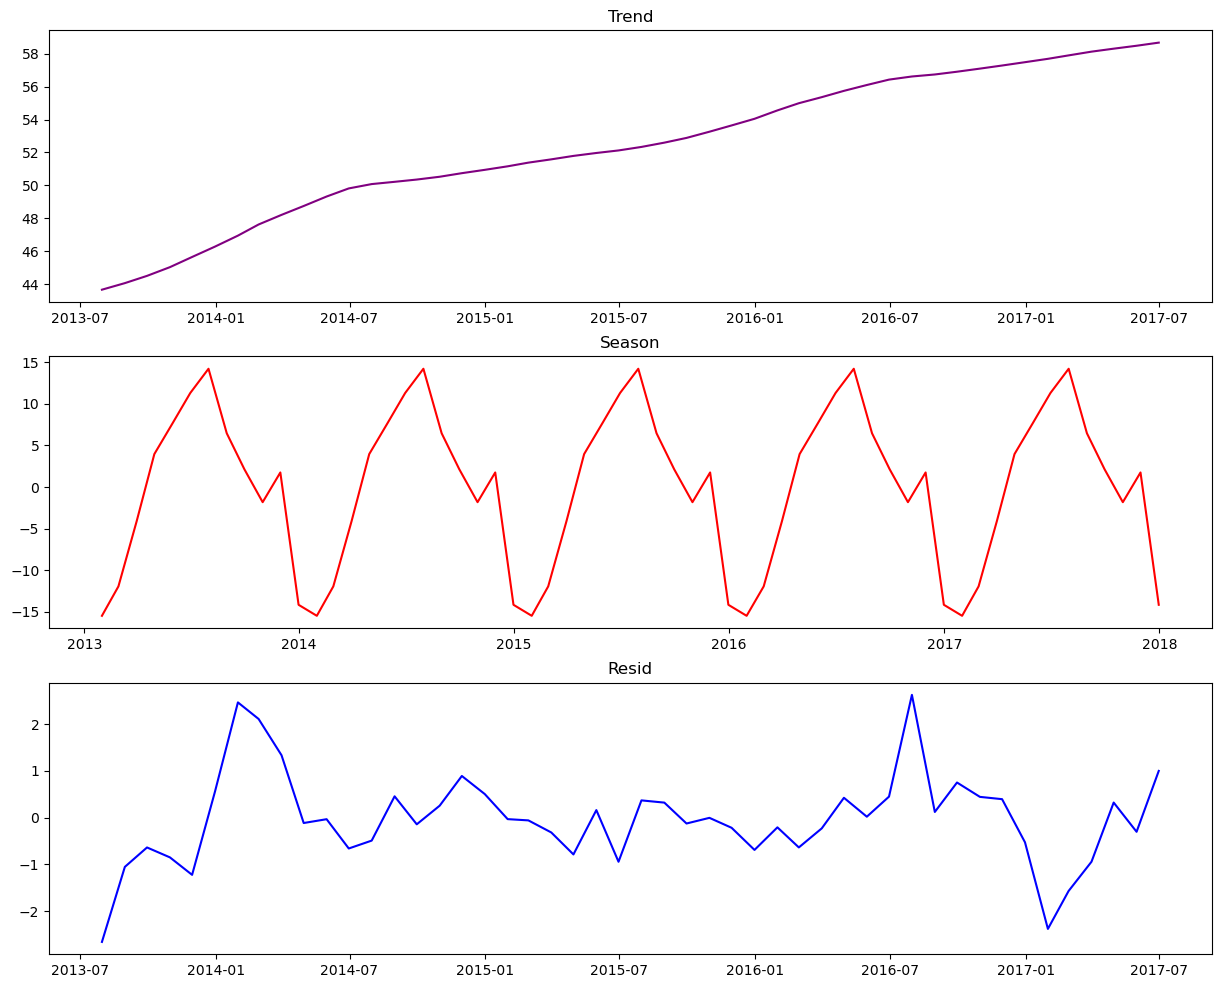

In [14]:
fig, axes = plt.subplots(3,1, figsize=(15,12))

axes[0].plot(trends,c='purple')
axes[0].set_title('Trend')
axes[1].plot(season,c='Red')
axes[1].set_title('Season')
axes[2].plot(resid,c='blue')
axes[2].set_title('Resid')


In [15]:
def checkStationarity(data):
    pvalue = adfuller(data['sales'])[1]
    print(pvalue)
    if pvalue < 0.05:
        msg = "pvalue={}. Data is Stationary. Proceed to model building".format(pvalue)
    else:
        msg = "pvalue={}. Data is not Stationary. Make the data stationary before model building".format(pvalue)

    return msg

## Stationarity check

In [16]:
checkStationarity(sales.resample('M').mean())

3.692387626163412e-06


'pvalue=3.692387626163412e-06. Data is Stationary. Proceed to model building'

## Simple exponent smoothening

In [17]:
def simplesmoothing(data,alpha):
    model = SimpleExpSmoothing(data).fit(smoothing_level=alpha)
    pdct = model.fittedvalues 
    
    df = pd.DataFrame({'actual':data, 'forecast':pdct})
    return(model,df)

In [18]:
alphas = [0,0.2, 0.6, 0.8]
models=[]
predicts={}
for a in alphas:
    m,df=simplesmoothing(sales.sales,a)
    models.append(m)
    predicts[m]=df.forecast

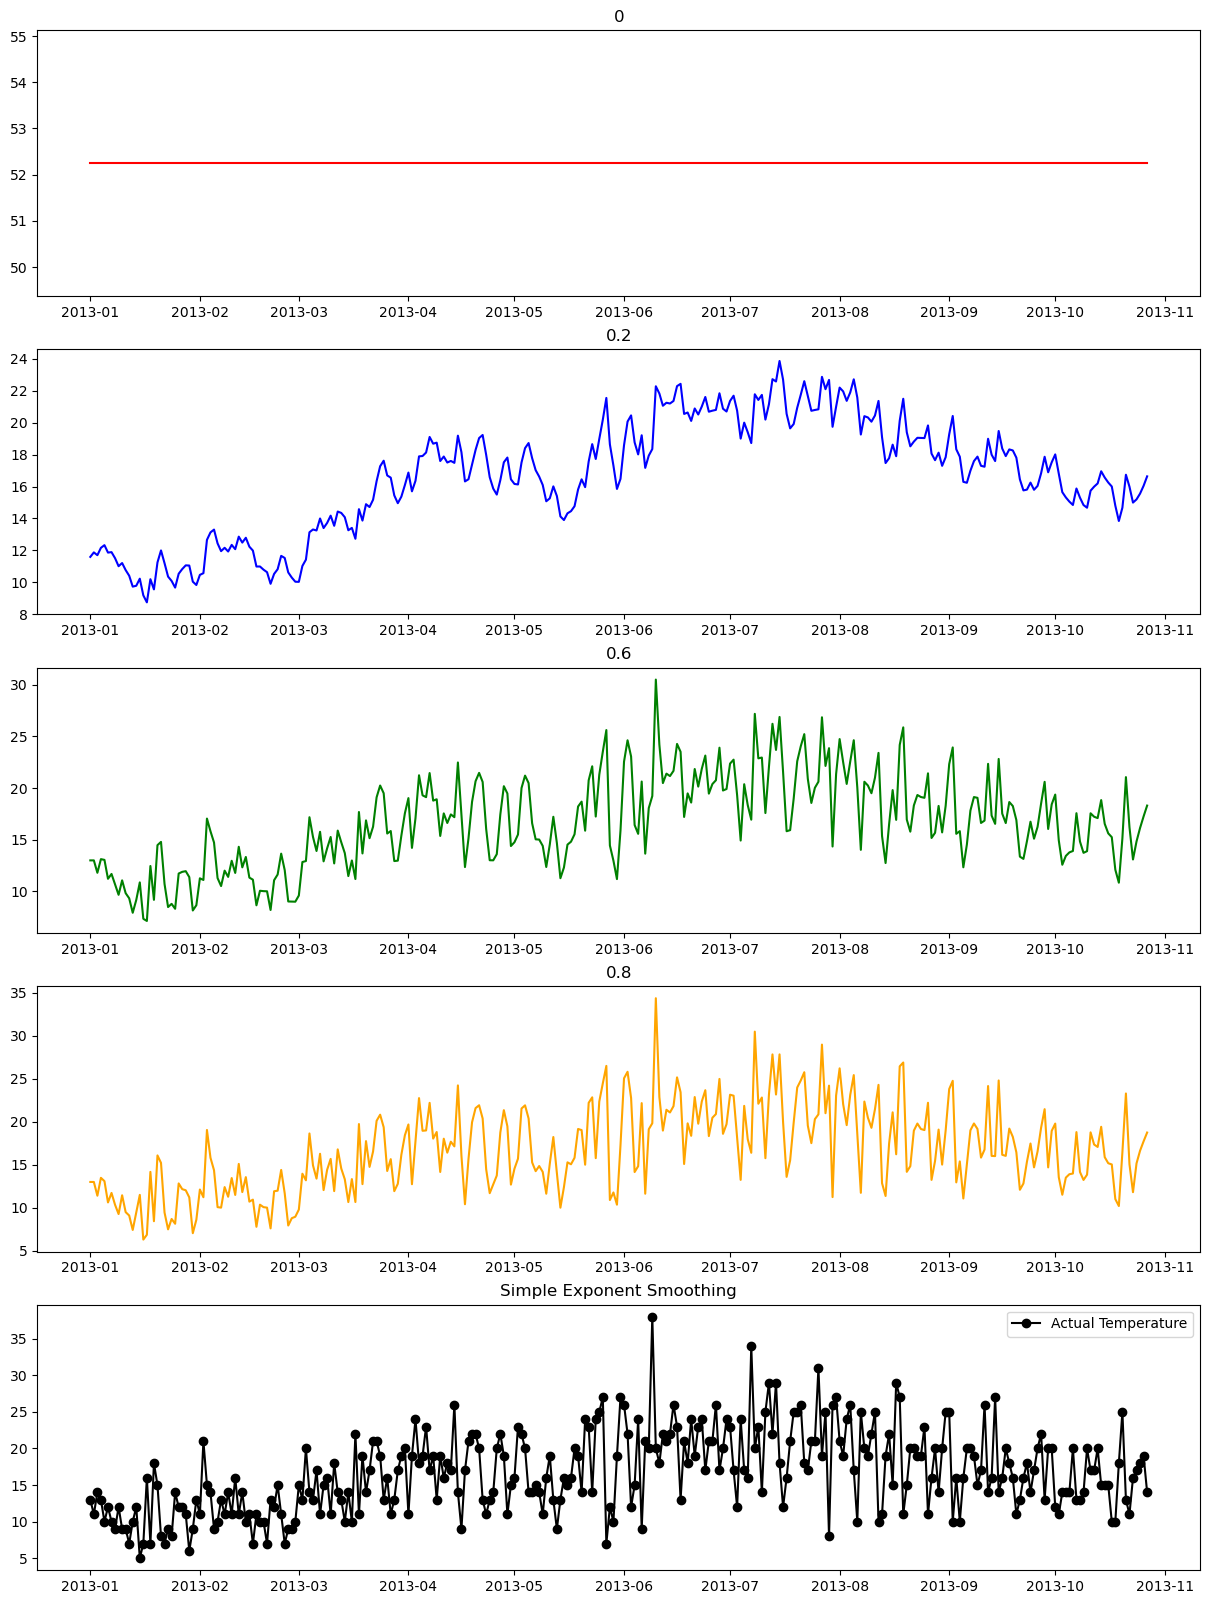

In [19]:
colors = ['red','blue','green','orange']


# plot the actual and forecast data
fig,ax = plt.subplots(5,1,figsize=(15,20))
plt.plot(sales.sales[0:300], marker='o', color='black',label='Actual Temperature')

for i in range(len(alphas)):
    ax[i].plot(predicts[models[i]][0:300],c=colors[i])
    ax[i].set_title(alphas[i])
    

plt.title('Simple Exponent Smoothing')
plt.legend()
plt.show()

## Conclusion:
Simple Exponential Smoothing: This method applies a weighted average to the historical data, with more recent observations given more weight than older observations. This is useful for smoothing out short-term fluctuations and identifying trends in the data. For example, in a retail sales context, simple exponential smoothing could be used to forecast demand for a particular product based on historical sales data.

## Double exponent smoothening

In [20]:
alpha,beta=0.25,0.45

In [21]:
model2 = ExponentialSmoothing(sales.sales,trend='additive').fit(smoothing_level=alpha, smoothing_trend=beta)

In [22]:
predicts=model2.fittedvalues

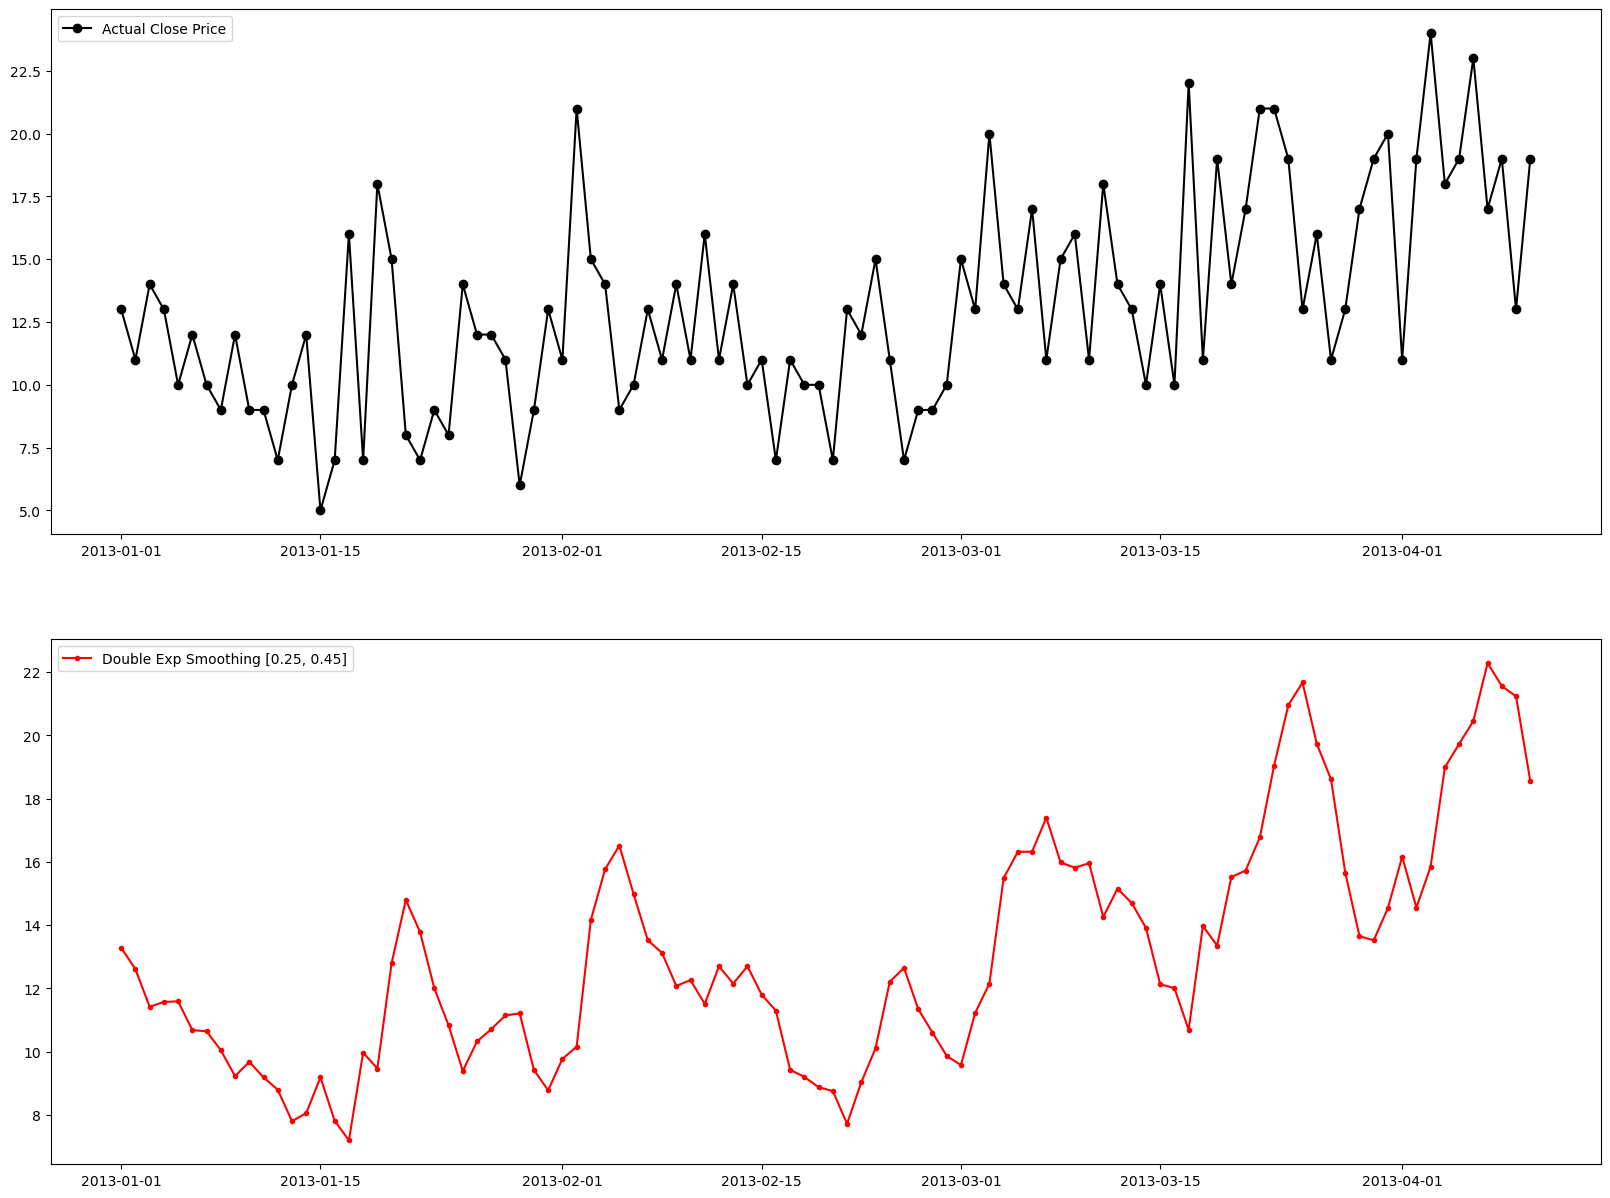

In [23]:
fig,ax = plt.subplots(2,1,figsize=(20,15))
ax[0].plot(sales.sales[0:100],marker='o',color='black',label='Actual Close Price')
ax[1].plot(predicts[0:100], marker='.',color='red',label='Double Exp Smoothing [0.25, 0.45]')
ax[0].legend()
ax[1].legend()

## Conclusion:
Double Exponential Smoothing: This method extends simple exponential smoothing by adding a second component to account for trends in the data. This is useful when the data exhibits a consistent upward or downward trend over time. For example, double exponential smoothing could be used to forecast the price of a particular stock based on historical price data, taking into account both short-term fluctuations and long-term trends.

## Triple exponent smoothening

In [24]:
alpha,beta,gamma=0.8,0.25,0.45

In [25]:
model2 = ExponentialSmoothing(sales.sales,trend='additive').fit(smoothing_level=alpha, smoothing_trend=beta,smoothing_seasonal=gamma)

In [26]:
predicts=model2.fittedvalues

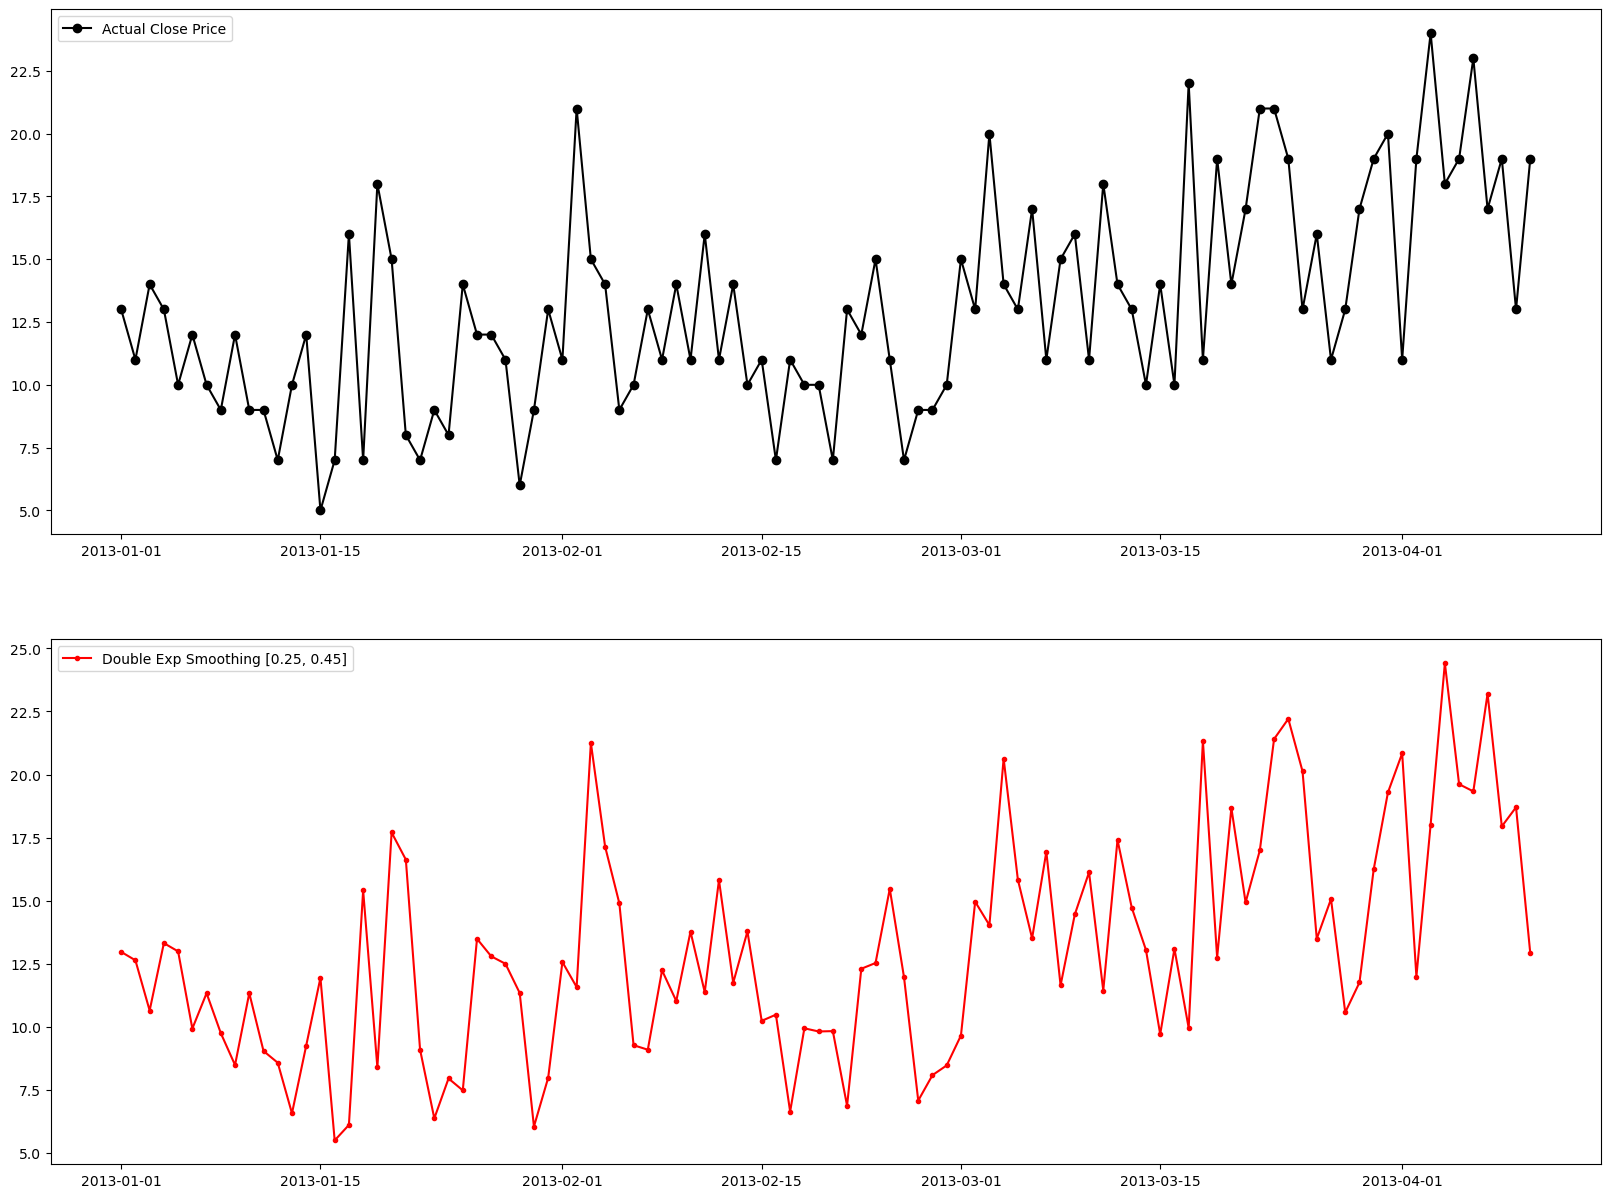

In [27]:
fig,ax = plt.subplots(2,1,figsize=(20,15))
ax[0].plot(sales.sales[0:100],marker='o',color='black',label='Actual Close Price')
ax[1].plot(predicts[0:100], marker='.',color='red',label='Double Exp Smoothing [0.25, 0.45]')
ax[0].legend()
ax[1].legend()

## Conclusion:
Triple Exponential Smoothing: This method extends double exponential smoothing by adding a third component to account for seasonality in the data. This is useful when the data exhibits recurring patterns or seasonality over time, such as weekly, monthly, or yearly cycles. For example, triple exponential smoothing could be used to forecast the number of visitors to a tourist attraction based on historical visitation data, taking into account both short-term fluctuations, long-term trends, and seasonality.